# Gensim Library

Gensim, a popular natural language processing library in Python, offers a module called gensim.models, which includes the Word2Vec model for generating word vectors. The Word2Vec model is a shallow, two-layer neural network that is trained to reconstruct linguistic contexts of words. While Word2Vec is not a deep learning model in the traditional sense, it uses neural network techniques to learn word embeddings from large text corpora. Therefore, while gensim's Word2Vec model does utilize neural network principles, it is not considered a deep learning approach.

# Library importation

In [108]:
import pdb
#import tensorflow as tf
import re
import string
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import PyPDF2
from pathlib import Path
import multiprocessing as ml
from tqdm import tqdm
from gensim.models import Word2Vec 
from gensim.models import KeyedVectors
from gensim import corpora
from gensim import utils
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
%matplotlib widget


# Function definition 

In [2]:
def read_pdf(file_path):
    try:
    # Read and extract text from a PDF file
        with open(file_path, "rb") as file:
            pdf_reader = PyPDF2.PdfReader(file)
            text = ""
            for page in pdf_reader.pages:
                text += page.extract_text() if page.extract_text() else ""
        return text
    except Exception as e:
        print(f'An error happened during the reading for file {file_path}')

In [3]:
def read_csv(file_path):
    # Read and extract text from a CSV file
    try:
        df = pd.read_csv(file_path)
        text = ' '. join(df['content'].astype(str))
        return text
    except Exception as e:
        print(f'An error happened during the reading for file {file_path}')

In [4]:
def read_txt(file_path):
    try:
        with open(file_path, 'r') as file:
            text= file.read()
            return text
    except Exception as e:
        print(f'An error happened during the reading for file {file_path}')

In [5]:
def get_path(folder_path):
    mpath = Path(folder_path)
    files_to_process = []
    for subfolder in mpath.iterdir():
        if subfolder.is_dir():
            files_to_process.extend(subfolder.glob('*.csv'))
            files_to_process.extend(subfolder.glob('*.pdf'))
            files_to_process.extend(subfolder.glob('*.txt'))
    return files_to_process

In [6]:
def get_text(texts):
    total_text = ''
    for path in tqdm(texts, desc='Reading Files'):
        if path.suffix == '.csv':
            total_text += read_csv(path)
        elif path.suffix == '.pdf':
            total_text += read_pdf(path)
        elif path.suffix == '.txt':
            total_text += read_txt(path)    
    return total_text

In [7]:
def clean_sentences(sentences):
    clean_sentences = []
    for st in sentences:
        tokens = st.translate(str.maketrans('', '', string.punctuation)).split()
        tokens = [word.lower() for word in tokens if word.isalpha()]
        if tokens:
            clean_sentences.append(tokens)
    return clean_sentences

In [8]:
def model_word2vector(sentences):
    model500 = Word2Vec(sentences, vector_size=500, window=5, min_count= 4, workers=ml.cpu_count())
    model3 = Word2Vec(sentences, vector_size=2, window=5, min_count= 4, workers=ml.cpu_count())
    return model500, model3

In [9]:
def clean_sentences(sentences):
    clean_sentences = []
    for st in sentences:
        tokens = st.translate(str.maketrans('', '', string.punctuation)).split()
        tokens = [word.lower() for word in tokens if word.isalpha()]
        if tokens:
            clean_sentences.append(tokens)
    return clean_sentences

# Data preparation and model Training

In [10]:
main_folder_path = 'data' 

In [11]:
all_texts = get_path(main_folder_path)
text = get_text(all_texts)

Reading Files: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.16s/it]


In [12]:
sentences = text.split('.')

sentences = clean_sentences(sentences)
model500, model3 = model_word2vector(sentences)

In [65]:
sentences[100]

['alpha',
 'and',
 'omega',
 'the',
 'last',
 'letter',
 'of',
 'the',
 'greek',
 'alphabet',
 'means',
 'from',
 'end']

# Models and Embeding save

In [14]:
model500.save('model500.model')
model3.save('model3.model')

In [15]:
model500 = Word2Vec.load('model500.model')
model3 = Word2Vec.load('model3.model')

In [16]:
model500.wv.save_word2vec_format('model500.txt', binary=False)
model500.wv.save_word2vec_format('model500.bin', binary=True)
model3.wv.save_word2vec_format('model3.txt', binary=False)
model3.wv.save_word2vec_format('model3.bin', binary=True)

# Results test

In [17]:
sentences[:100]

[['april', 'april', 'apr'],
 ['is',
  'the',
  'fourth',
  'month',
  'of',
  'the',
  'year',
  'in',
  'the',
  'julian',
  'and',
  'gregorian',
  'calendars',
  'and',
  'comes',
  'between',
  'march',
  'and',
  'may'],
 ['it', 'is', 'one', 'of', 'four', 'months', 'to', 'have', 'days'],
 ['april',
  'always',
  'begins',
  'on',
  'the',
  'same',
  'day',
  'of',
  'the',
  'week',
  'as',
  'july',
  'and',
  'additionally',
  'january',
  'in',
  'leap',
  'years'],
 ['april',
  'always',
  'ends',
  'on',
  'the',
  'same',
  'day',
  'of',
  'the',
  'week',
  'as',
  'december'],
 ['april',
  'comes',
  'between',
  'march',
  'and',
  'may',
  'making',
  'it',
  'the',
  'fourth',
  'month',
  'of',
  'the',
  'year'],
 ['it',
  'also',
  'comes',
  'first',
  'in',
  'the',
  'year',
  'out',
  'of',
  'the',
  'four',
  'months',
  'that',
  'have',
  'days',
  'as',
  'june',
  'september',
  'and',
  'november',
  'are',
  'later',
  'in',
  'the',
  'year'],
 ['april

In [18]:
vect = model500.wv['game']

In [19]:
vect

array([ 2.05296040e+00,  1.72644541e-01, -7.37579226e-01,  1.18658328e+00,
       -3.11458647e-01, -1.26340961e+00,  6.41920388e-01,  2.65969896e+00,
       -3.53557736e-01,  7.84569860e-01, -1.22073424e+00,  6.00910604e-01,
       -3.57555121e-01, -1.92363858e+00, -8.47138822e-01,  2.04990178e-01,
        4.81032819e-01, -6.06256962e-01, -6.60584211e-01, -1.25631794e-01,
        1.24869490e+00,  4.46041584e-01,  8.28057289e-01, -7.98109233e-01,
        8.44614148e-01, -2.75152206e-01,  2.34416589e-01,  3.43399495e-01,
        2.96141118e-01,  1.13482997e-01,  8.01328897e-01,  1.80777538e+00,
        7.49589428e-02,  2.37495825e-01, -2.00752374e-02,  2.48302251e-01,
       -3.83693576e-01,  8.30088675e-01,  8.08467865e-01,  3.52887601e-01,
        1.75990796e+00,  6.60579026e-01, -8.89675379e-01,  3.74749929e-01,
       -2.32147157e-01, -8.84768128e-01, -2.68477821e+00, -4.90365416e-01,
        1.09073377e+00, -1.17273676e+00,  1.43671865e-02, -8.42758954e-01,
        3.45449150e-01, -

In [20]:
game_nw = model500.wv.most_similar('game', topn=20)
game_nw

[('games', 0.7238022089004517),
 ('gameplay', 0.6138268709182739),
 ('multiplayer', 0.6110207438468933),
 ('mode', 0.5750215649604797),
 ('puzzle', 0.5578755736351013),
 ('nintendo', 0.5504930019378662),
 ('firstperson', 0.5385764837265015),
 ('console', 0.52683025598526),
 ('singleplayer', 0.5253084301948547),
 ('shooter', 0.5230375528335571),
 ('sonic', 0.5153393149375916),
 ('minecraft', 0.5128764510154724),
 ('pokémon', 0.5113309621810913),
 ('sega', 0.5103791356086731),
 ('rpg', 0.5099177360534668),
 ('ds', 0.5033871531486511),
 ('playstation', 0.49891507625579834),
 ('roleplaying', 0.4946524500846863),
 ('kart', 0.49391865730285645),
 ('card', 0.4918796718120575)]

In [21]:
king_nw = model500.wv.most_similar('king', topn=20)
king_nw

[('queen', 0.6083275079727173),
 ('ruler', 0.6073508262634277),
 ('prince', 0.5910059809684753),
 ('kings', 0.5842695832252502),
 ('emperor', 0.5769534707069397),
 ('pharaoh', 0.5640438795089722),
 ('vi', 0.561855673789978),
 ('throne', 0.541532576084137),
 ('iii', 0.5271286368370056),
 ('iv', 0.5167313814163208),
 ('monarch', 0.5154858231544495),
 ('sultan', 0.5068414211273193),
 ('vii', 0.5031252503395081),
 ('mercia', 0.4997924268245697),
 ('duke', 0.4991946220397949),
 ('pakhangba', 0.4937076270580292),
 ('lord', 0.48868653178215027),
 ('crown', 0.48594966530799866),
 ('regent', 0.4829978942871094),
 ('anjou', 0.4819735586643219)]

In [22]:
queen_nw = model500.wv.most_similar('queen', topn=20)
queen_nw

[('princess', 0.6685808300971985),
 ('consort', 0.6224381327629089),
 ('king', 0.608327329158783),
 ('elizabeth', 0.5724159479141235),
 ('empress', 0.5383224487304688),
 ('countess', 0.5354657769203186),
 ('crown', 0.534330427646637),
 ('lady', 0.5273129343986511),
 ('himiko', 0.5182142853736877),
 ('spades', 0.514226496219635),
 ('monarch', 0.512993574142456),
 ('duchess', 0.5107103586196899),
 ('jubilee', 0.5098320245742798),
 ('ladyinwaiting', 0.5052348971366882),
 ('margrethe', 0.5020276308059692),
 ('prince', 0.49484771490097046),
 ('matilda', 0.4793170392513275),
 ('isabella', 0.4773341715335846),
 ('dowager', 0.47694194316864014),
 ('mary', 0.4742419719696045)]

In [23]:
man_nw = model500.wv.most_similar('man', topn=20)
man_nw

[('woman', 0.6873817443847656),
 ('girl', 0.5637731552124023),
 ('boy', 0.5588844418525696),
 ('person', 0.5350883603096008),
 ('men', 0.5129743218421936),
 ('creature', 0.48811036348342896),
 ('fisherman', 0.48438766598701477),
 ('policeman', 0.48358097672462463),
 ('dog', 0.46859297156333923),
 ('himself', 0.456925630569458),
 ('soldier', 0.4552364945411682),
 ('someone', 0.44569435715675354),
 ('cat', 0.4402894377708435),
 ('doctor', 0.43526145815849304),
 ('wizard', 0.43413296341896057),
 ('horse', 0.4147935211658478),
 ('somebody', 0.41361427307128906),
 ('thief', 0.41223299503326416),
 ('mask', 0.4109710454940796),
 ('victim', 0.4077298939228058)]

The last values are the resulting cosines calculated between the query word and the key words, those values are important for the interaction because in a sentence where
there is a semantic meaning, by calculating the cosines between 
the words of the sentences we will be able to calculate the attention vector. 
This attention vector will show us how much attention our language model gives to the rest of the words within the sentence when it reads a specific word. This means the
the model will reflect what words are more important to get a context for the analyzed sentence

# Word Generation

In [24]:
queen_vec = model500.wv['king'] - model500.wv['man'] + model500.wv['women']

In [25]:
queen_real_vec = model500.wv['queen']

In [26]:
#similarity = model500.wv.similarity(quee_vec, quee_real_vec)
queens_dot = np.dot(queen_real_vec, queen_vec)
queen_mag = np.linalg.norm(queen_vec)
queen_real_mag = np.linalg.norm(queen_real_vec)
queens_cosine = queens_dot / (queen_mag*queen_real_mag)

In [27]:
queens_cosine

0.50089395

# Basic interaction with the model (Analogy)

In [28]:
def analogy(vec1, vec2, vec3):
    similarity = model500.wv.most_similar(positive=[vec1, vec3], negative=[vec2])
    print(f"{vec1} is to {vec2} as {similarity[0][0]} is a {vec3}")

In [29]:
nlgy = analogy('two', 'second', 'third') 

two is to second as three is a third


In [30]:
nlgy2 = analogy('man', 'king', 'queen') 

man is to king as woman is a queen


In [31]:
nlgy3 = analogy('america', 'continent', 'ocean') 

america is to continent as atlantic is a ocean


The vectors for words as man, king and queen are query vectors, and the resulting vector as woman is a vector key

# 2D model view

In [32]:
load_embedig = KeyedVectors.load_word2vec_format('model3.txt', binary=False)

In [33]:
words = list(load_embedig.index_to_key)

In [34]:
vectors = [load_embedig[word] for word in words]

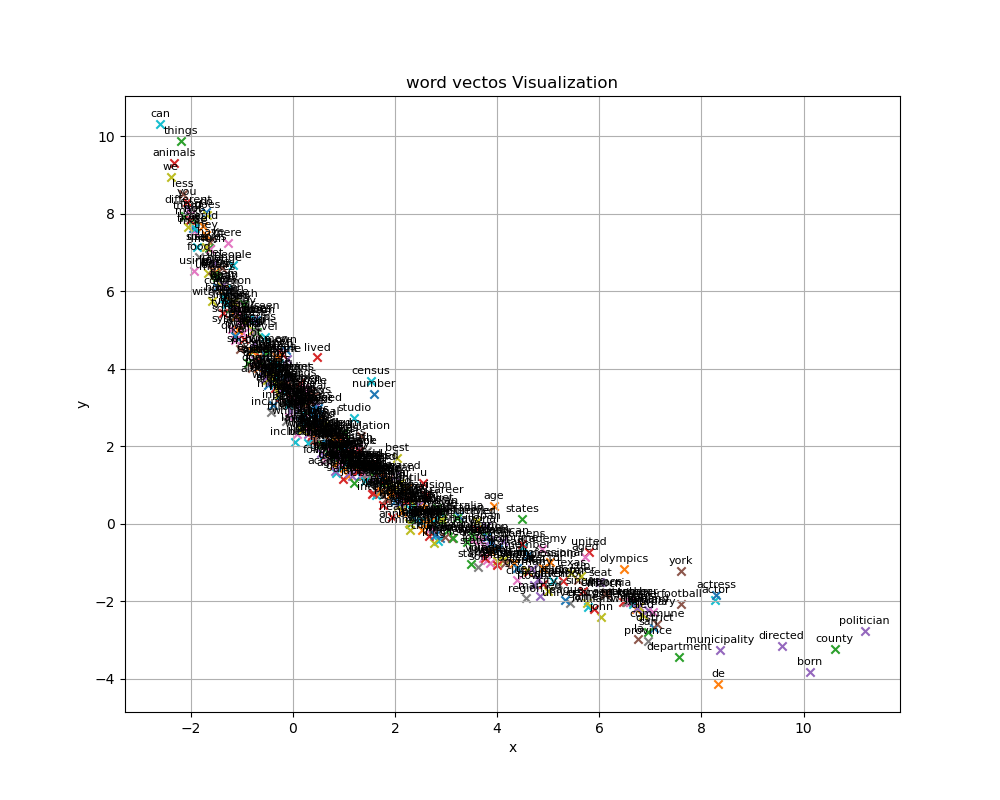

In [35]:
plt.figure(figsize=(10, 8))
for i, label in enumerate(words[:500]):
    x, y = vectors[i]
    plt.scatter(x, y, marker='x')
    plt.annotate(label, (x, y), textcoords = 'offset points', xytext=(0,5), ha='center', fontsize=8)

plt.title("word vectos Visualization")
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

# PCA 2D Reduction and Visualization

In [36]:
emb500= KeyedVectors.load_word2vec_format('model500.txt', binary=False)

In [37]:
type(emb500)

gensim.models.keyedvectors.KeyedVectors

In [38]:
words500 = list(emb500.index_to_key)

In [39]:
vectors500 = [emb500[word] for word in words500]

In [40]:
print(len(words500))
print(len(vectors500))

143341
143341


In [41]:
pca_model = PCA(n_components = 2)

In [42]:
pca_model.fit(vectors500)

PCA(n_components=2)

In [43]:
pca_2d_vec500 = pca_model.transform(vectors500)

In [44]:
pca_2d_vec500

array([[-7.45050416,  0.98019282],
       [-5.97868578,  2.61575995],
       [-4.49004707,  1.34462053],
       ...,
       [ 0.07577086,  0.05197008],
       [ 0.05932779,  0.14992921],
       [ 0.02075928,  0.01859356]])

In [45]:
key_val500 = []
for i, k in zip(words500, pca_2d_vec500):
    key_val500.append((i, k))


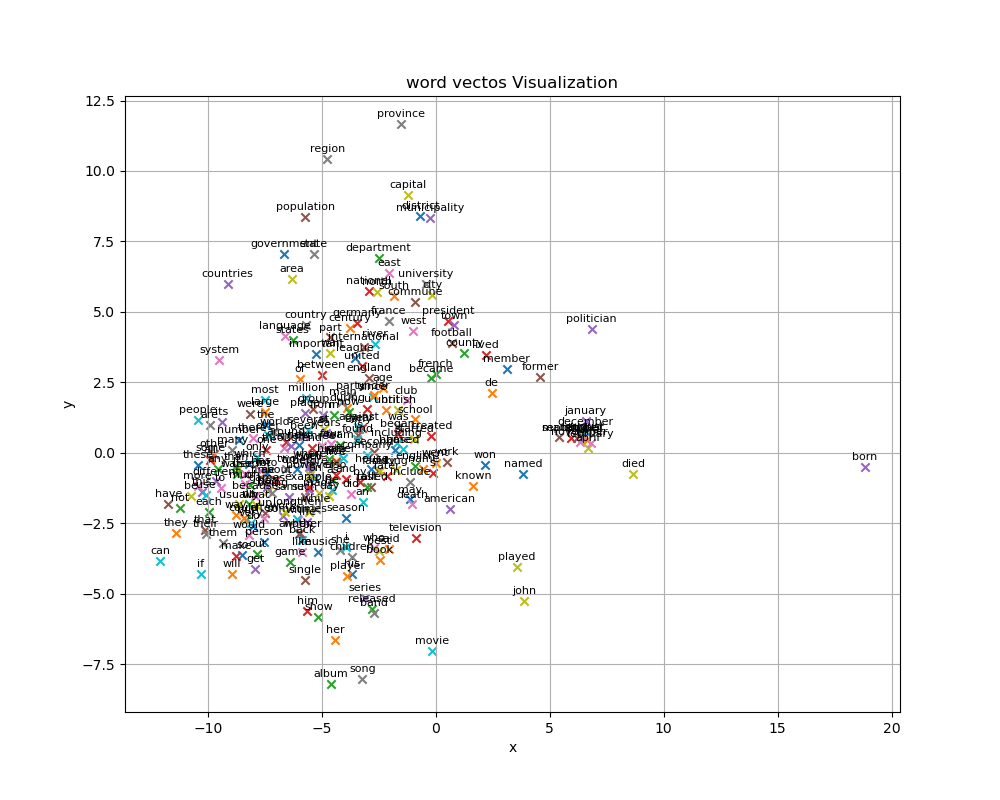

In [46]:
plt.figure(figsize=(10, 8))
for label, i in key_val500[:250]:
    x, y = i
    plt.scatter(x, y, marker='x')
    plt.annotate(label, (x, y), textcoords = 'offset points', xytext=(0,5), ha='center', fontsize=8)

plt.title("word vectos Visualization")
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

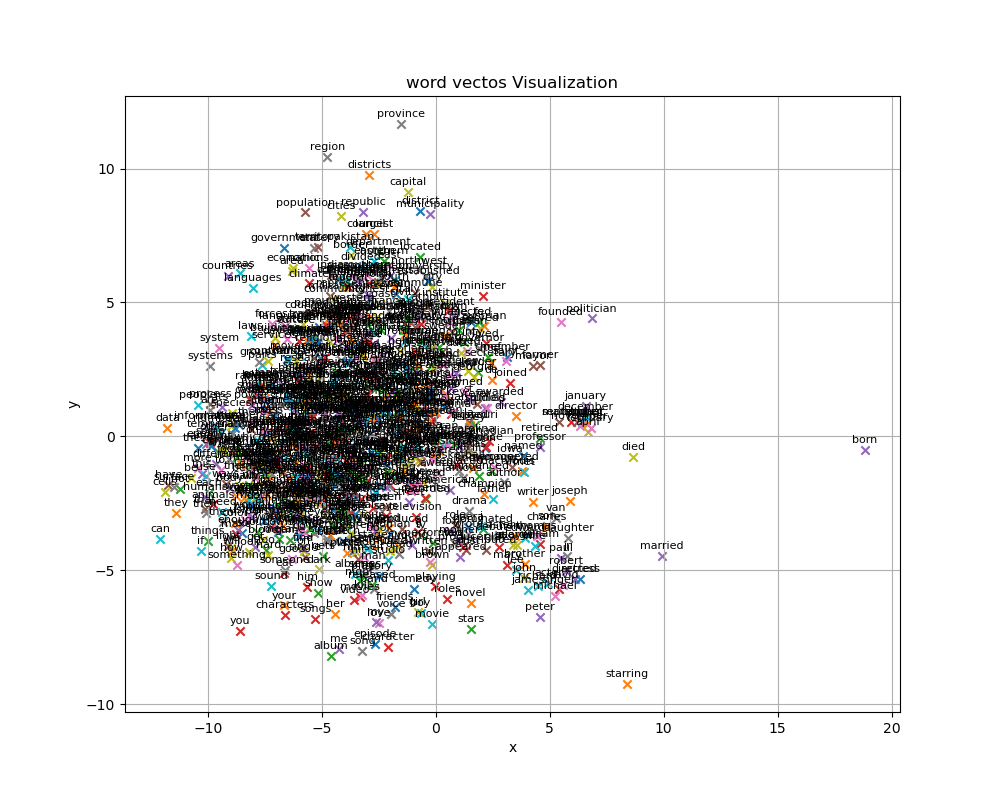

In [47]:
plt.figure(figsize=(10, 8))
for label, i in key_val500[:1000]:
    x, y = i
    plt.scatter(x, y, marker='x')
    plt.annotate(label, (x, y), textcoords = 'offset points', xytext=(0,5), ha='center', fontsize=8)

plt.title("word vectos Visualization")
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

# PCA 3D Reduction and Visualization

In [48]:
pca_model3d = PCA(n_components = 3)

In [49]:
pca_model3d.fit(vectors500)

PCA(n_components=3)

In [50]:
pca_3d_vec500 = pca_model3d.transform(vectors500)

In [51]:
key_val500_3D = []
for i, k in zip(words500, pca_3d_vec500):
    key_val500_3D.append((i, k))

In [52]:
key_val500_3D[0]

('the', array([-7.45050094,  0.9802126 , -0.04427495]))

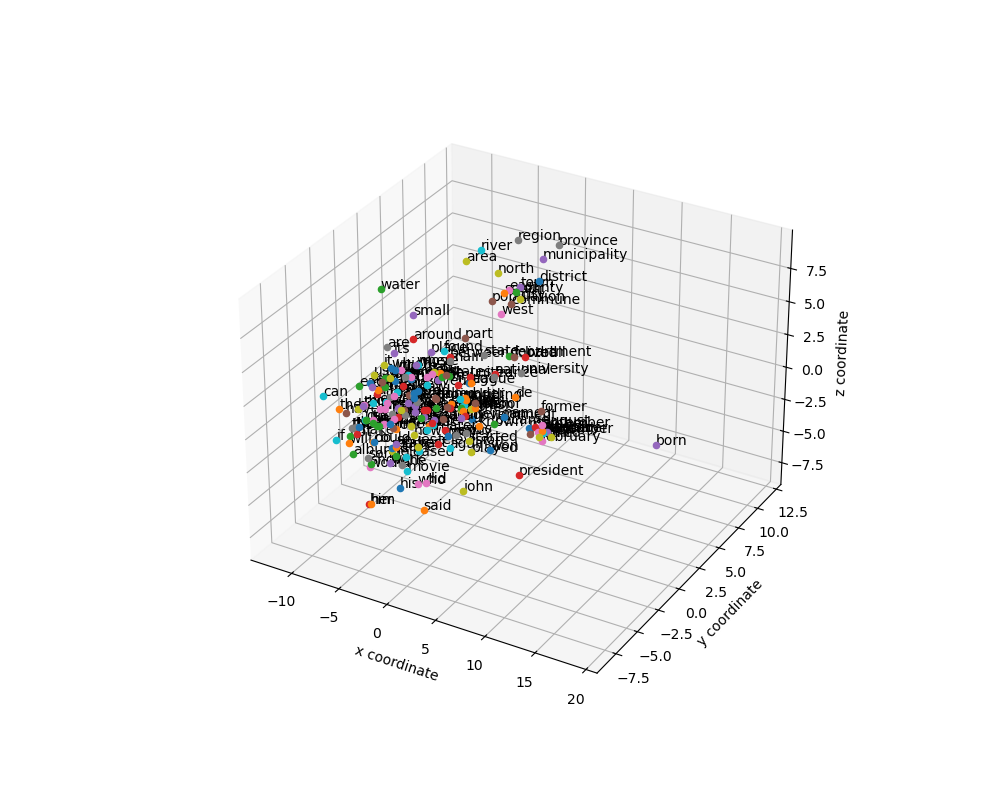

In [125]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for label, (x, y, z) in key_val500_3D[:200]:
    ax.scatter(x,y,z, label=label)
    ax.text(x, y, z, label)
ax.set_xlabel('x coordinate')
ax.set_ylabel('y coordinate')
ax.set_zlabel('z coordinate')
plt.show()

# Attention Matrix

The attention matrix is a way to visualize which words the model is paying more attention to. It presents the result of the cosine calculation between the vector of each word and the vectors of the other words. The obtained values represent how much attention the model is paying to each word within the sentence. Therefore, the highest values are associated with the words that the model considers most important in the context of the sentence.

In [83]:
#sentence = 'Algebra from arabic transliterated aljabr meaning reunion of broken parts is a part of mathematics'
sentence = 'alpha is the first letter of the greek alphabet'

In [84]:
model_500 = KeyedVectors.load('model500.model', mmap='r')

In [85]:
# Filter tokens to ensure all of them are in the model's vocabulary
tokens1 = [word.lower() for word in sentence.split() if word.lower() in model_500.wv.key_to_index]

In [86]:
embeddings1 = np.array([model_500.wv.get_vector(token) for token in tokens])

In [87]:
attention_matrix1 = cosine_similarity(embeddings)

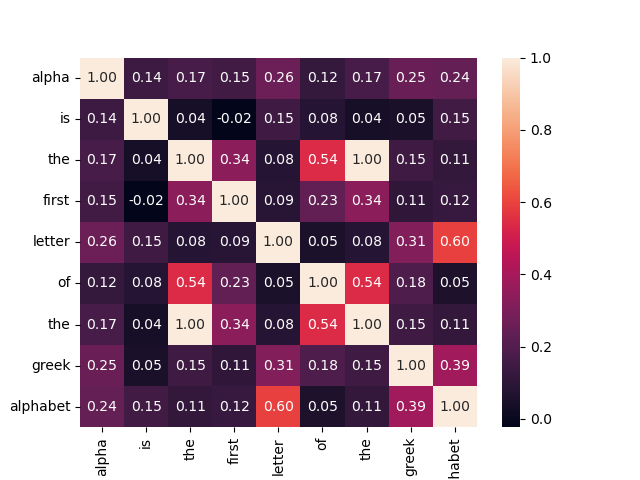

In [88]:
fig3, ax = plt.subplots()
sns.heatmap(attention_matrix1, annot=True, fmt=".2f", xticklabels=tokens, yticklabels=tokens)
plt.show()

In [89]:
sentence2 = "The capital of France is Paris"

In [90]:
tokens2 = [word.lower() for word in sentence2.split() if word.lower() in model_500.wv.key_to_index]

In [95]:
embeddings2 = np.array([model_500.wv.get_vector(token) for token in tokens2])

In [96]:
attention_matrix2 = cosine_similarity(embeddings2)

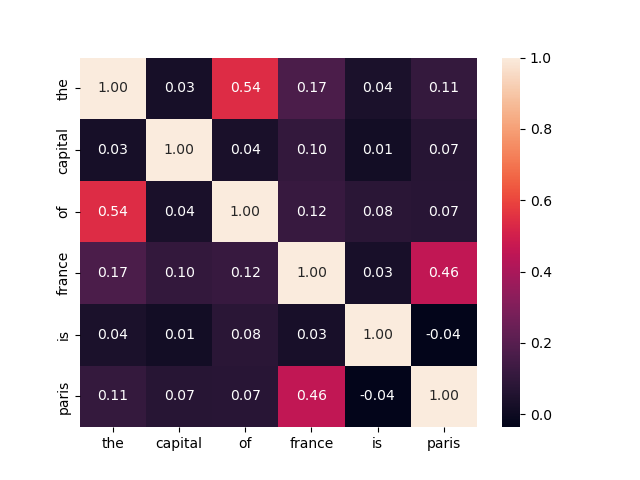

In [97]:
fig4, ax4 = plt.subplots()
sns.heatmap(attention_matrix2, annot=True, fmt=".2f", xticklabels=tokens2, yticklabels=tokens2)
plt.show()

In [103]:
sentence3 = "Python is one of the most popular programming languages in the world"

In [104]:
tokens3 = [word.lower() for word in sentence3.split() if word.lower() in model_500.wv.key_to_index]

In [105]:
embeddings3 = np.array([model_500.wv.get_vector(token) for token in tokens3])

In [106]:
attention_matrix3 = cosine_similarity(embeddings3)

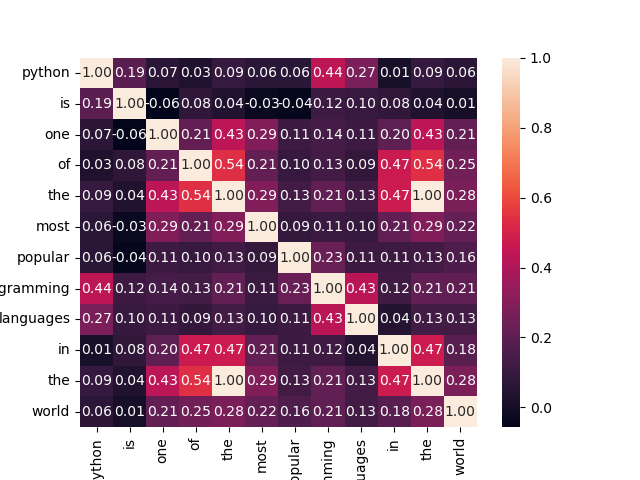

In [107]:
fig5, ax5 = plt.subplots()
sns.heatmap(attention_matrix3, annot=True, fmt=".2f", xticklabels=tokens3, yticklabels=tokens3)
plt.show()

In [120]:
sentence4 = 'semantics is the branch of linguistics and logic concerned with meaning'

In [121]:
tokens4 = [word.lower() for word in sentence4.split() if word.lower() in model_500.wv.key_to_index]

In [122]:
embeddings4 = np.array([model_500.wv.get_vector(token) for token in tokens4])

In [123]:
attention_matrix4 = cosine_similarity(embeddings4)

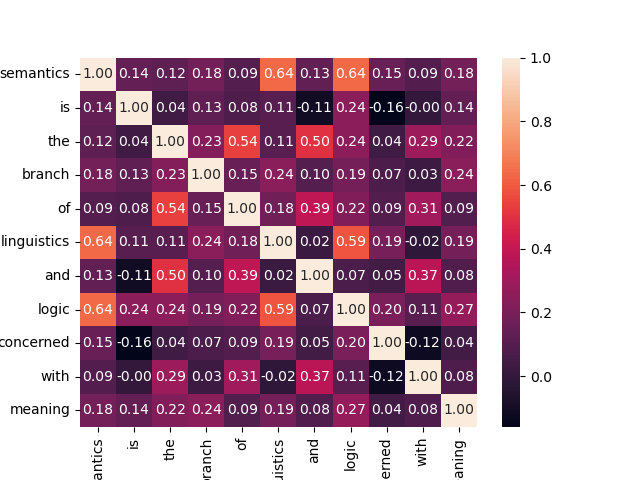

In [124]:
fig6, ax6 = plt.subplots()
sns.heatmap(attention_matrix4, annot=True, fmt=".2f", xticklabels=tokens4, yticklabels=tokens4)
plt.show()